# K-mean clustering algorithm

> 클러스터링(군집화)로 널리 사용되는 비지도학습 알고리즘 K-Means -> "비지도학습"

## 클러스터링, 군집화란 무엇인가

만약 우리가 다루는 데이터에 “레이블”이 붙어 있다면 지도학습, 즉 미리 가지고 있는 데이터와 레이블을 기반으로 예측이나 분류를 수행하는 모델을 만들 수 있다. 그러나 실제로는 레이블(분류)이 없는 경우가 더 많다. 물론 이렇게 별도의 레이블이 없는 데이터 안에서 패턴과 구조를 발견하는 비지도 학습도 머신러닝의 큰 축이고, 그 중 가장 대표적인 비지도 학습 기술이 바로 Clustering(군집화)이다.

참고로 지도학습 Classification(분류)과 엄연히 다른 거다. Classification은 미리 레이블이 붙어 있는 데이터들을 학습해서 그걸 바탕으로 새로운 데이터에 대해 분류를 수행하지만, Clustering은 레이블을 모르더라도 그냥 비슷한 속성을 가진 데이터들끼리 묶어주는 역할을 하기 때문이다.

아무튼 클러스터링, 군집화를 사용하는 예로는 아래와 같은 것들을 들 수 있다.
- 추천 엔진 : 사용자 경험을 개인화하기 위해 비슷한 제품 묶어주기
- 검색 엔진: 관련 주제나 검색 결과 묶어주기
- 시장 세분화(segmentation): 지역, 인구 통계, 행동에 따라 비슷한 고객들 묶어주기

## 군집화의 목표

군집화의 목표는 서로 유사한 데이터들은 같은 그룹으로, 서로 유사하지 않은 데이터는 다른 그룹으로 분리하는 것이 된다. 그러면 자연스럽게 2개의 질문이 따라올 거다.

1. 몇개의 그룹으로 묶을 것인가
2. 데이터의 “유사도”를 어떻게 정의할 것인가 (유사한 데이터란 무엇인가)
이 두 질문을 해결할 수 있는 가장 유명한 전략이 바로 K-Means 알고리즘이다.

## K-Means 군집화의 원리

“K“는 데이터 세트에서 찾을 것으로 예상되는 클러스터(그룹) 수를 말한다.
“Means“는 각 데이터로부터 그 데이터가 속한 클러스터의 중심까지의 평균 거리를 의미한다. (이 값을 최소화하는 게 알고리즘의 목표가 된다.)
**K-Means에서는 이걸 구현하기 위해 반복적인(iterative) 접근을 취한다.**

1. 일단 K개의 임의의 중심점(centroid)을 배치하고
2. 각 데이터들을 가장 가까운 중심점으로 할당한다. (일종의 군집을 형성한다.)
3. 군집으로 지정된 데이터들을 기반으로 해당 군집의 중심점을 업데이트한다.
4. 2번, 3번 단계를 그래서 수렴이 될 때까지, 즉 더이상 중심점이 업데이트 되지 않을 때까지 반복한다.


- 파이썬 라이브러리 scikit-learn를 사용하면 K-means를 매우 쉽게 적용해볼 수 있다. 단순 예제 코드다. 데이터가 없음을 유의하자.

```python
from sklearn.cluster import KMeans

model = KMeans(n_clusters=k)
model.fit(data)
model.predict(samples)
```

## K값, 군집의 개수 정하기

군집화를 하기 위해서는 몇개의 군집이 적절할지 결정해야 하는데, 그러려면 일단 “좋은 군집”이란 무엇인지 정의할 수 있어야 한다.

만약 군집화가 잘 되었면 각 군집의 샘플이 가까운 거리에서 오밀조밀하게 묶일 거다. 군집 내의 데이터들이이 얼마나 퍼져 있는지 (혹은 얼마나 뭉쳐있는지) 응집도는 inertia 값으로 확인한다. inertia는 각 데이터로부터 자신이 속한 군집의 중심까지의 거리를 의미하기 때문에 inertia 값이 낮을수록 군집화가 더 잘 됐다고 볼 수 있는 거다.

sciklit-learn으로 모델을 만들었다면 `print (model.inertia_)` 찍어보면 쉽게 찾을 수 있다.

그래서 군집의 개수, 즉 k 값을 바꿔가면서 inertia를 그래프로 표시하면 보통 이런 모양새가 나온다.

![image.png](image/knn-kmeans-img1.png)

k값이 증가하면 intertia 값은 감소하다가 어느정도 수준이 되면 거의 변화를 안 보이게 된다. 대부분의 경우 너무 많지 않은 군집으로 분류하면서도 intertia 값이 작은 상태. 이게 그나마 최선이 될 거다. 위의 그래프를 예로 들면 최적의 클러스터 수는 3으로 보인다.

---


## 좀 더 자세하게 k-mean steps

1. prepare data
2. decide how many clusters you need
3. choose initial center of cluster (centroid)
- randomly select centroid
- manually assign centroid
- kmean++
4. assign data point to nearest cluster
5. move centroid to the center of its cluster
6. repeat step 4 and step 5, **until there is no assigned cluster change**

## 이론 실습

### 센트로이드를 움직이면서 센트로이드 부터 거리 계산하기

#### 1. randomly select centroid
![image.png](image/knn-kmeans-img2.png)

- c1, c2, c3와 같이 해당 클러스터링 포인트를 마음대로 두자

![image.png](image/knn-kmeans-img3.png)

- 위와 같이 첫번째 이터레이션을 마무리할 수 있다.

![image.png](image/knn-kmeans-img4.png)

- 위 사진과 같이 c1, c2, c3를 이동시키자.
- 클러스터의 중심이 변경이 되었으니 이제부터 위 거리 계산하기를 다시 반복한다. 

![image.png](image/knn-kmeans-img5.png)

- 4번 지점이 원래 c1과 가장 가까웟지만 이동 된 센트로이드 값에 따라서 c3과 가장 가까워 졌다.
- 이제 두번째 이터레이션도 끝났다. 이제 다시 센트로이드를 각 점의 중간지점으로 옮겨주자.

![image.png](image/knn-kmeans-img6.png)

- 이제 반복을 하다보면 아무런 이동이 없는 일이 생길 것이다. 그러면 이제 센트로이드 이동과 이터레이션 반복이 끝난 것이다.

#### 2. manually assign centroid

- 위와 같이 랜덤값으로 박아도 반복하다보면 분명히 클러스터링 개수만큼 나눠지게 되어 있다. 하지만 위 같은 경우 말고, 지리적으로 근처 지역의 집합, 군집화로 나누는 경우가 있다. 바로 아래 그림 처럼 말이다.

![image.png](image/knn-kmeans-img7.png)

- 위 사지는 위도 경도 값으로 특정 지역 포인터가 어디 집합에 속하는지 클러스터링 할 수 있다.

#### 3. kmean++

- 랜덤값의 결과가 마음에 들지 않고, 특정 이니셜 포인터를 줄 수 없는 경우에 사용한다. 
- 이론적으로 그렇게 어려운 개념은 아니다. 센트로이드를 k개 줄때, 첫 번째 c1 센트로이드를 지정하고, 해당 지점과 가장 먼 곳이 c2가 된다. c3는 c1과 c2에게 **공통적으로 먼곳**으로 둔다. 
- 실제 `sklearn.cluster` 에서 우리가 1, 2와 같은 방식을 사용하여 센트로이드를 두지 않을 경우 이런 방식(kmeans++)으로 센트로이드를 지정하고 군집화를 해준다.


> ***이제 코드 실습을 해보자***

---

## 코드 실습

In [21]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### create data points

In [22]:
df = pd.DataFrame(columns=['x', 'y'])
df.loc[0] = [3,1]
df.loc[1] = [4,1]
df.loc[2] = [3,2]
df.loc[3] = [4,2]
df.loc[4] = [10,5]
df.loc[5] = [10,6]
df.loc[6] = [11,5]
df.loc[7] = [11,6]
df.loc[8] = [15,1]
df.loc[9] = [15,2]
df.loc[10] = [16,1]
df.loc[11] = [16,2]
df.loc[12] = [15,6]
df.loc[13] = [8,6]
df.head(22)

,x,y
0,3,1
1,4,1
2,3,2
3,4,2
4,10,5
5,10,6
6,11,5
7,11,6
8,15,1
9,15,2


### Visualize data points on 2D plot (2차원)

/Users/nuung/Desktop/CodingStudy/machine-learning/python-jupyter/.venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(30.299999999999997, 0.5, 'y')

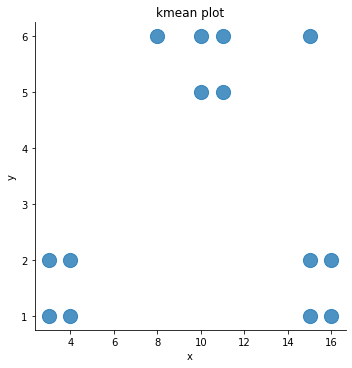

In [23]:
# visualize data point
sns.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s": 200}) # x-axis, y-axis, data, no line, marker size

# title
plt.title('kmean plot')

# x-axis label
plt.xlabel('x')

# y-axis label
plt.ylabel('y')


### k-mean clustering


In [24]:
# convert dataframe to numpy array
data_points = df.values

# 이니셜 센트로이드를 주지않았음 
# default로 kmeans++로 이니셜 센트로이드를 먼저 지정해줌 
kmeans = KMeans(n_clusters=3).fit(data_points)

# cluster id for each data point
kmeans.labels_


array([1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2], dtype=int32)

In [25]:
# this is final centroids position
kmeans.cluster_centers_


array([[15.4,  2.4],
       [ 3.5,  1.5],
       [10. ,  5.6]])

In [26]:
df['cluster_id'] = kmeans.labels_
df.head(12)


,x,y,cluster_id
0,3,1,1
1,4,1,1
2,3,2,1
3,4,2,1
4,10,5,2
5,10,6,2
6,11,5,2
7,11,6,2
8,15,1,0
9,15,2,0


/Users/nuung/Desktop/CodingStudy/machine-learning/python-jupyter/.venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'after kmean clustering')

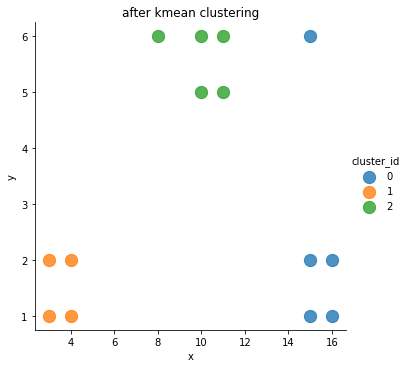

In [27]:
sns.lmplot('x', 'y', data=df, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 150}, # marker size
           hue="cluster_id") # color

# title
plt.title('after kmean clustering')



# K-Nearest Neighbors Algorithm

- k-최근접 알고리즘, KNN

## 타이타닉 예시

- 타이타닉 탑승자 데이터를 가지고 누가 살아남았는지 예측해보자
- 생존, 사망에 대한 답이 있고 (지도 학습), 그 답에 대해 예측을 하는 "분류 문제" 이다.
- 특정 값 중심으로 가장 가까운 K 개를 찾아서, 특정 값을 예측한다. 
- 데이터가 조금 밖에 없으면 신뢰가 안간다. 
- 데이터가 많을 수록 신뢰도가 올라간다 -> 머신러닝으로 볼 수 있다. 
